In [1]:
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp

import pylib


In [2]:
nbm.print_metadata()


context: local
hostname: thinkpad
interpreter: 3.10.6 (main, Mar 10 2023, 10:55:28) [GCC 11.3.0]
nbcellexec: null
nbname: species-inference-stats
nbpath: /home/mmore500/2023-05-22/hstrat-recomb-concept/notebooks/species-inference-stats.ipynb
revision: null
session: 50ed0933-7625-4bae-a920-05ea6f02c472
timestamp: 2023-05-24T02:15:37Z00:00


IPython==7.31.1
keyname==0.5.2
yaml==6.0
matplotlib==3.6.2
nbmetalog==0.2.6
pandas==1.5.2
seaborn==0.12.1
teeplot==0.5.0
re==2.2.1
debugpy==1.6.6
logging==0.5.1.2
psutil==5.9.0
zmq==22.3.0
json==2.0.9
ipykernel==6.7.0


In [3]:
df = pylib.util.concat_dataframes_from_glob(
    "a=reconstruction-accuracy+*+ext=.csv"
)


In [4]:
df


,Unnamed: 0,replicate,treatment,quartet distance
0,0,9,ring,0.159083
1,0,0,ring,0.326013
2,0,4,ring,0.375511
3,0,9,bag,0.639642
4,0,3,bag,0.614346
5,0,1,ring,0.264039
6,0,8,allopatry,0.277430
7,0,3,ring,0.231750
8,0,5,allopatry,0.241357
9,0,6,bag,0.515499


In [5]:
all(df["quartet distance"] < 0.66)


True

teeplots/./viz=boxplot-quartet+x=treatment+y=quartet-distance+ext=.pdf
teeplots/./viz=boxplot-quartet+x=treatment+y=quartet-distance+ext=.png


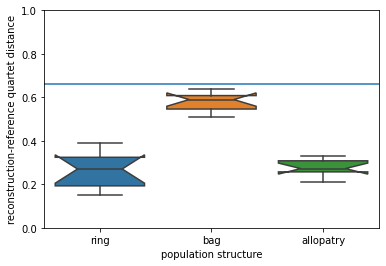

In [6]:
def boxplot_quartet(data, x, y):
    sns.boxplot(
        data=data,
        x=x,
        y=y,
        notch=True,
    )
    plt.ylim(0, 1)
    plt.ylabel("reconstruction-reference quartet distance")
    plt.xlabel("population structure")
    plt.axhline(0.66)


tp.tee(
    boxplot_quartet,
    data=df,
    x="treatment",
    y="quartet distance",
)
